Welcome to your DataCamp Project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your Project.

The first step is forking the repository in which this notebook lives. After that, there are three parts to be completed in this notebook:

- **Project information**:  The title of the Project, a Project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your Project.

- **Rough draft of code for rest of Project:** a rough draft of the remaining code for the rest of your Project (no accompanying text cells required).

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp Project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Do more expensive wines taste better?

**Name:** Daniel Van Hasselt

**Email address associated with your DataCamp account:** danielvanhasselt@hotmail.com

**Project description**: 

Did you know there exists an organization dedicated to *wine economics*? They are called the [American Association of Wine Economists](https://www.wine-economics.org) and yes, they even publish papers! A decade ago, they published the interesting paper titled "[Do More Expensive Wines Taste Better?](http://www.wine-economics.org/aawe/wp-content/uploads/2012/10/AAWE_WP16.pdf)". With the use of blind tastings, they discovered that the correlation between price and rating is actually *negative*. This means it doesn't make sense for the average individual to pay more for wine! Surprising, right? However, they did find a positive correlation between price and rating for trained wine experts. In this project, you will find out if you can reproduce this positive relationship and along the way, discover the maximum price you should pay for a bottle of wine!

This Project will let you apply the knowledge gained from the [Web Scraping in Python](https://www.datacamp.com/courses/web-scraping-with-python) course. This required course will introduce you to the basic HTML structure of webpages, the XPath notation and the Python webscraping library scrapy. You should also be familiar with Python and pandas DataFrames, which you can learn in these courses:

- [pandas foundation](https://www.datacamp.com/courses/pandas-foundations)
- [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas)


The data used in this Project will be scraped from the website of [Wine Enthusiast](https://www.winemag.com).



# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp Project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp Project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a Project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your Project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your Project.

As you are completing each task, you may wish to consult the Project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Creating our Spider

A decade ago, the [American Association of Wine Economists](https://www.wine-economics.org) published a paper titled "[Do More Expensive Wines Taste Better?](http://www.wine-economics.org/aawe/wp-content/uploads/2012/10/AAWE_WP16.pdf)". With the use of blind tastings, they found a *negative* relationship between the price and overall rating of wine. However, they found a positive correlation between price and rating for trained wine experts. In this project, we will try to replicate this positive relationship. We will also try to find out if there is some optimal price point, after which price increases do not lead to increases in rating anymore (as reviewed by the experts). Yes, our goal is to become *data driven* wine buyers!

We will scrape the data from the web, more specifically from the [Wine Enthusiast website](https://www.winemag.com). As we will see, the Python ecosystem has fantastic libraries that handle most of the complexity of webscraping. In this project, we will use the scrapy library, so let's get started by first creating our Spider object!

The structure of our scrapy Spider class is shown below. Don't worry about all the class methods, we wil tackle them one by one!


In [1]:
# Import Scrapy
import scrapy

# Create Spider object
class WineMag(scrapy.Spider):
    
    # Name Spider
    name = "winemag"
    
    # Required start_requests method (step 2.)
    def start_requests(self):
        pass
    
    # Method to parse overview page (step 3.)
    def parse_overview(self, response):
        pass
    
    # Method to parse details page (step 4.)
    def parse_detail(self, response):
        pass



## 2. Define the list of URLs

After creating the spider object, we will have to define a list of the webpages that hold our desired data. The URL which contains the overview of the most recent wine ratings is the following, for example: "https://www.winemag.com/?s=&drink_type=wine&pub_date_web=2019&page=1".
We will define this list of URLs in the method *start_requests*, which is a required method for a scrapy Spider object. Let's say we would like 1000 ratings for each of the last 5 years. With 20 ratings per page, this means we should scrape the first 50 pages.


In [2]:
# Define required start_requests method
def start_requests(self):
    
    # URL without page number
    base_url = "https://www.winemag.com/?s=&drink_type=wine&pub_date_web={}&page="
    
    # list of URLs by year : 2015 - 2019
    urls = [base_url.format(str(2019-i)) for i in range(5)]
    
    # Loop over URLs
    for url in urls:
        # Scrape first 50 pages per year
        for i in range(1,51):
            # Yield URL in Scrapy Request method
            yield scrapy.Request( url = url + str(i), callback = self.parse_overview)

            
# Define parse_overview method (next step)
def parse_overview(self, response):
    pass
    


## 3. Investigate the source

The next step is to find the exact HTML elements (and their classes!) which hold our desired data. We can inspect the source of a webpage by using the keyboard combination "CTRL+U" or by choosing the option "Page source" from the right mouse click menu. As we can see, the overview pages contain the most basic data: the name, price and rating of each wine. We will extract the text from the relevant HTML elements by defining a *parse_overview* method. As we would also like more detailed information, we will *follow* the link of every review. For extracting the data, we will use the XPath notation.


In [3]:
# Define parse_overview method
def parse_overview(self, response):

    # Get all wines from overview page
    wines = response.xpath('//li[@class="review-item"]')
    
    # Extract name of wine
    name = wines.xpath('.//div[@class="title"]/text()').extract()
    
    # Extract rating
    ratings = wines.xpath('.//div[@class="info"]/span[@class="rating"]//text()').extract()
    
    # Remove string 'Points' so list only contains rating values
    rating = [r for r in ratings if 'POINTS' not in r.upper()]
    
    # Extract price
    price = wines.xpath('.//span[@class="price"]/text()').extract()
    
    # Extract link to details page
    links = wines.xpath('./a[@class="review-listing"]/@href').extract()
    
    # Follow URL for details
    for link in links:
        yield response.follow(url = link, callback = self.parse_detail)

        

## 4. Get down to the details

Now, we have to define the *parse_detail* method that we used to follow the links in the previous step. We would also like to know the alcohol percentage, the color of the wine, the review date and the editor of each wine review. This step is a bit more tricky, as the HTML elements holding this information (except editor) are not defined by seperate classes, as on the overview page. We will use some Python dictionary tricks to extract the information we want.


In [4]:
# Define parse_overview method
def parse_detail(self, response):
    
    # Get URL of response object
    url = response.url
    
    # Extract detail info
    details = response.xpath('//ul[@class="secondary-info"]')
    
    # Extract labels and values
    labels = details.xpath('.//div[@class="info-label small-7 columns"]//text()')
    values = details.xpath('.//div[@class="info small-9 columns"]//text()')
    
    # Zip labels and values
    data = dict(zip([l.extract().strip() for l in labels],[v.extract().strip() for v in values]))

    # Extract alcohol, colour and review date
    alcohol = data["Alcohol"]
    color = data["Category"]
    date = data["Date Published"]
    
    # Extract editor
    editor = response.xpath('//div[@class="name"]/text()').extract()[0].strip()
    
    

## 5. Extract the information to csv files

In the steps before, we defined the methods that will extract our desired data. Now we have make sure we save the extracted data. We will export the results of both parse methods to CSV files. By saving the URL of each wine review in both exports, we will have a common key on which to join both datasets in a later step. We will have to define these final steps in the respective methods. Note that the overview page contains 20 reviews per page, but the detail page does not! 

In [5]:
# parse_overview method
def parse_overview(self, response):
    
    # Extraction part (done in step 3.)
    # ...
    
    # Name export file of overview data : overview.csv 
    file = 'datasets/overview.csv'
    
    # Open file as 'append' (= adds to file without deleting previous stored data) 
    with open(file, 'a') as f: 
        # Loop over each review
        for i in range(len(wines)):
            # Write each review to file
            f.writelines( [hrefs[i] + '|' + name[i] + '|' + rating[i] + '|' + price[i] + '|' + '\n'] )

            
# parse_detail method
def parse_detail(self, response):
    
    # Extraction part (done in step 4.)
    # ...
    
    # Name export file of details data : details.csv 
    file = 'datasets/details.csv'
    
    # Open file as 'append' (= adds to file without deleting previous stored data) 
    with open(file, 'a') as f:
        # Write to CSV file
        f.writelines( [url + '|' + alcohol + '|' + color + '|' + date + '|' + editor + '\n'] )
        


## 6. Crawl spider, crawl!

Alright! We defined the full spider class object. We made sure we exported the extracted data to CSV files. So, now, it is time to make our Spider crawling the web! We first have to import the scrapy *CrawlerProcess*. After instantiating this object, we have to tell it which spider to use for crawling and let it run!

In [6]:
# Import CrawlerProcess
from scrapy.crawler import CrawlerProcess

# Instantiate CrawlerProcess
process = CrawlerProcess()

# Provide Spider as argument
process.crawl(WineMag)

# Run crawler
process.start()


:0: UserWarning: You do not have a working installation of the service_identity module: 'cannot import name 'opentype''.  Please install it from <https://pypi.python.org/pypi/service_identity> and make sure all of its dependencies are satisfied.  Without the service_identity module, Twisted can perform only rudimentary TLS client hostname verification.  Many valid certificate/hostname mappings may be rejected.
2019-04-08 23:23:08 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2019-04-08 23:23:08 [scrapy.utils.log] INFO: Versions: lxml 3.5.0.0, libxml2 2.9.3, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 18.4.0, Python 3.5.2 (default, Nov 12 2018, 13:43:14) - [GCC 5.4.0 20160609], pyOpenSSL 17.5.0 (OpenSSL 1.1.0g  2 Nov 2017), cryptography 2.1.4, Platform Linux-4.15.0-47-generic-x86_64-with-Ubuntu-16.04-xenial
2019-04-08 23:23:08 [scrapy.crawler] INFO: Overridden settings: {}
2019-04-08 23:23:09 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.log

## 7. Combine data into DataFrame

Great, the spider did its work! We have the overview and the details data in seperate CSV files. Now, we will join both datasets together on their common key: the URL! We will use pandas to create DataFrames of each dataset and join them together!

In [7]:
# Import pandas
import pandas as pd

# Create DataFrame of overview file
overview = pd.read_csv('datasets/overview.csv')
# Set column names 
overview.columns= ['URL','Name','Rating', 'Price']
# Set URL as index
overview.set_index('URL', inplace=True)

# Create DataFrame of details file
details = pd.read_csv('datasets/details.csv')
# Set column names 
details.columns = ['URL', 'Alcohol', 'Color','RatingDate', 'Editor']
# Set URL as index
details.set_index('URL', inplace=True)

# Join DataFrames
winemag = overview.join(details, how='inner').reset_index()

# Inspect result
winemag.head(10)


,URL,Name,Rating,Price,Alcohol,Color,RatingDate,Editor
0,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2012 All Profits to Charity R...,89.0,$18,13.8%,Red,12/31/2016,Jim Gordon
1,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2014 All Profits to Charity S...,84.0,$18,13.5%,White,12/31/2016,Jim Gordon
2,https://www.winemag.com/buying-guide/100-perce...,100 Percent Wine 2015 Moscato (California),86.0,$18,12.2%,White,2/1/2017,Jim Gordon
3,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,91.0,$19,15.2%,Red,3/1/2016,Jim Gordon
4,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,91.0,$19,15.2%,Red,3/1/2016,Jim Gordon
5,https://www.winemag.com/buying-guide/1000-stor...,1000 Stories 2014 Bourbon Barrel Aged Batch No...,90.0,$19,15.6%,Red,7/1/2017,Jim Gordon
6,https://www.winemag.com/buying-guide/10span-20...,10Span 2012 Chardonnay (Santa Barbara County),85.0,$8,13.5%,White,6/1/2015,Matt Kettmann
7,https://www.winemag.com/buying-guide/10span-20...,10Span 2013 Pinot Noir (Central Coast),83.0,$7,13.5%,Red,7/1/2015,Matt Kettmann
8,https://www.winemag.com/buying-guide/113-nv-br...,1+1=3 NV Brut Sparkling (Cava),87.0,$16,11.5%,Sparkling,11/1/2015,Michael Schachner
9,https://www.winemag.com/buying-guide/113-nv-br...,1+1=3 NV Brut Sparkling (Cava),87.0,$16,11.5%,Sparkling,11/1/2016,Michael Schachner


## 8. Deduplicate data

By inspecting the first 10 rows of our dataset, we see that this dataset contains duplicates. We will deduplicate our data, as well as remove records with empty cells and the URL column.

In [8]:
# Print info before deduplication
print(winemag.info())

# Remove duplicates from data
winemag = winemag.drop_duplicates()

# Remove records with empty cells
winemag = winemag.dropna()

# Remove URL
winemag.drop('URL', axis=1, inplace=True)

# Print info after deduplication
print(winemag.info())

winemag.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90192 entries, 0 to 90191
Data columns (total 8 columns):
URL           90192 non-null object
Name          90192 non-null object
Rating        90192 non-null float64
Price         85276 non-null object
Alcohol       87194 non-null object
Color         90192 non-null object
RatingDate    90192 non-null object
Editor        90192 non-null object
dtypes: float64(1), object(7)
memory usage: 5.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79603 entries, 0 to 90191
Data columns (total 7 columns):
Name          79603 non-null object
Rating        79603 non-null float64
Price         79603 non-null object
Alcohol       79603 non-null object
Color         79603 non-null object
RatingDate    79603 non-null object
Editor        79603 non-null object
dtypes: float64(1), object(6)
memory usage: 4.9+ MB
None


,Name,Rating,Price,Alcohol,Color,RatingDate,Editor
0,100 Percent Wine 2012 All Profits to Charity R...,89.0,$18,13.8%,Red,12/31/2016,Jim Gordon
1,100 Percent Wine 2014 All Profits to Charity S...,84.0,$18,13.5%,White,12/31/2016,Jim Gordon
2,100 Percent Wine 2015 Moscato (California),86.0,$18,12.2%,White,2/1/2017,Jim Gordon
3,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,91.0,$19,15.2%,Red,3/1/2016,Jim Gordon
5,1000 Stories 2014 Bourbon Barrel Aged Batch No...,90.0,$19,15.6%,Red,7/1/2017,Jim Gordon
6,10Span 2012 Chardonnay (Santa Barbara County),85.0,$8,13.5%,White,6/1/2015,Matt Kettmann
7,10Span 2013 Pinot Noir (Central Coast),83.0,$7,13.5%,Red,7/1/2015,Matt Kettmann
8,1+1=3 NV Brut Sparkling (Cava),87.0,$16,11.5%,Sparkling,11/1/2015,Michael Schachner
9,1+1=3 NV Brut Sparkling (Cava),87.0,$16,11.5%,Sparkling,11/1/2016,Michael Schachner
10,1+1=3 NV Cygnus Brut Made With Organic Grapes ...,89.0,$18,11.5%,Sparkling,11/1/2017,Michael Schachner


## 9. Transform columns to numeric

As we can see in the column data types, all columns have 'object' as datatype, with the exception of the Rating column. We will transform the RatingDate to a datetime data type. We will also transform the Price and Alcohol columns to a numeric data type, so we can do calculations with them in a later step.

In [9]:
# Transform RatingDate to datetime data type
winemag["RatingDate"] = pd.to_datetime(winemag["RatingDate"], format='%m/%d/%Y')

# Transform Price column to numeric data type
winemag["Price"] = winemag["Price"].apply(lambda x : round(float(str(x).replace("$","")),0) )

# Transform Alcohol column to numeric data type
winemag["Alcohol"] = winemag["Alcohol"].apply(lambda x : round(float(str(x).replace("%","")),1) )

# Inspect statistics of numeric columns
winemag.describe()



,Rating,Price,Alcohol
count,79603.000000,79603.000000,79603.000000
mean,89.045714,37.709672,13.933454
std,2.885377,48.007982,38.641403
min,80.000000,4.000000,2.500000
25%,87.000000,18.000000,13.000000
50%,89.000000,28.000000,13.500000
75%,91.000000,45.000000,14.400000
max,100.000000,5000.000000,8333.000000


## 10. Clean data 

Whoa! Our data contains some wines with crazy alcohol percentages and prices! Let's remove the unrealistic Price and Alcohol values from our data. Suppose an alcohol percentage between 10% and 20% is acceptable and prices up until $100 are 'reasonable'.

In [10]:
# Keep Prices below $100
winemag = winemag[winemag.Price <= 100]

# Keep Alcohol percentages between 10% and 20%
winemag = winemag[(winemag.Alcohol >= 10) & (winemag.Alcohol <= 20)]

# Inspect statistics of data
winemag.describe()



,Rating,Price,Alcohol
count,76094.000000,76094.000000,76094.000000
mean,88.914382,32.954267,13.603029
std,2.802355,19.655821,1.042906
min,80.000000,4.000000,10.000000
25%,87.000000,18.000000,13.000000
50%,89.000000,27.000000,13.500000
75%,91.000000,44.000000,14.300000
max,100.000000,100.000000,20.000000


## 11. Find the relationship & the optimal price!

Finally! We extracted the data from the web, we combined the overview and the details of each wine review together and cleaned our dataset. Now, it is time to find out the relationship between price and rating for our wine experts! All we need are the Price and Rating columns, which we need to group by Price. How does the average rating behave when the price goes up?!

           Price    Rating
Price   1.000000  0.541891
Rating  0.541891  1.000000


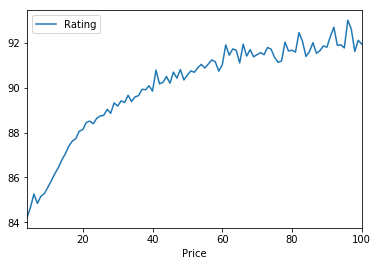

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Show graphs in notebook
%matplotlib inline

# Print correlation
print(winemag[["Price","Rating"]].corr())

# Plot the average Rating by price
winemag[["Price","Rating"]].groupby('Price').mean().plot()



# 12. Conclusion

We successfully replicated one of the findings from the original paper! For wine experts, there is indeed a *positive* correlation between price and rating! We also can see on the graph that the rating doesn't really increase anymore as soon we pay around 60 dollars a bottle. Thus, spending $100 for a bottle of wine will not bring us more enjoyment. Instead, two bottles for 50 dollars each seems the *data driven* way to maximize our enjoyment! ;)

In [12]:
# Conclusion
positive_relationship = True

# Print conclusion
if positive_relationship:
    print("For wine experts, we indeed find a positive relationship between price and rating!")
    

For wine experts, we indeed find a positive relationship between price and rating!


# Other ideas

In [13]:
# Differences in ratings by editor
editors = winemag[['Rating','Editor']].groupby('Editor').mean()
editors.sort_values('Rating')


,Rating
Editor,
Fiona Adams,86.430303
Alexander Peartree,86.608200
Carrie Dykes,86.789091
Michael Schachner,87.133059
Lauren Buzzeo,87.667447
Jeff Jenssen,88.235294
Roger Voss,88.502912
Christina Pickard,88.558266
Jim Gordon,88.612866


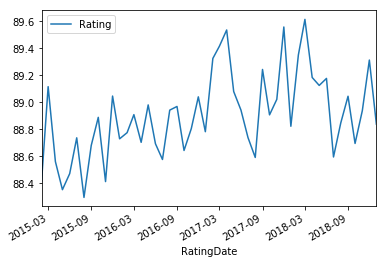

In [14]:
# Rating over time
winemag[['RatingDate','Rating']].groupby('RatingDate').mean().plot()


In [15]:
# Average price for a wine with a Rating of 100
winemag[winemag.Rating == 100][["Price","Rating"]].groupby("Rating").mean()


,Price
Rating,
100.0,79.75


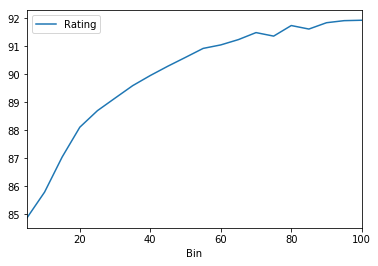

In [16]:
# Create bins of $5 
winemag["Bin"] = winemag["Price"].apply(lambda x : round(x/5,0)*5 )

# Plot average rating by bin
winemag[["Bin","Rating"]].groupby("Bin").mean().plot()


In [17]:
# Price by class of rating
def ClassifyRating(x):
    
    """
    98–100 Classic The pinnacle of quality.
    94–97 Superb A great achievement.
    90–93 Excellent Highly recommended.
    87–89 Very Good Often good value; well recommended.
    83–86 Good Suitable for everyday consumption; often good value.
    80–82 Acceptable Can be employed in casual, less-critical circumstances.
    """
    
    if x >= 98:
        return 'Classic'
    elif x >= 94:
        return 'Superb'
    elif x >= 90:
        return 'Excellent'
    elif x >= 87:
        return 'Very good'
    elif x >= 83:
        return 'Good'
    elif x >= 80:
        return 'Acceptable'
    else:
        return 'Unacceptable'

# New columns
winemag["Segment"] = winemag["Rating"].apply(ClassifyRating)
    
# Show average price by segment
segments = winemag[["Segment","Price", "Rating"]].groupby("Segment").mean()
segments.sort_values("Rating", ascending=False)


,Price,Rating
Segment,,
Classic,79.000000,98.428571
Superb,60.970844,94.443510
Excellent,41.154781,91.164749
Very good,27.568255,87.969204
Good,20.307554,85.112959
Acceptable,18.380717,81.515451


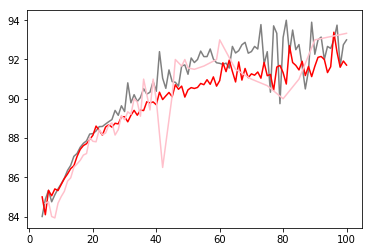

In [18]:
# Plot rating by color
plt.plot(winemag[winemag.Color == 'White'][["Price","Rating"]].groupby('Price').mean(), color='grey')
plt.plot(winemag[winemag.Color == 'Red'  ][["Price","Rating"]].groupby('Price').mean(), color='red')
plt.plot(winemag[winemag.Color == 'Rose' ][["Price","Rating"]].groupby('Price').mean(), color='pink')


In [19]:
# Average rating by color
winemag[["Rating","Color"]].groupby("Color").mean().sort_values('Rating', ascending=False)


,Rating
Color,
Port/Sherry,90.368902
Dessert,90.226891
Fortified,89.454545
Red,89.149695
Sparkling,88.962693
White,88.670905
Rose,87.232721
